# Project 2020
Using Linear Regression I am to determine the power output from a wind turbine based on wind speed, the goal of this is not to simply use scikit's LinearRegression function to simply put a straight line on a plot. While it certainly will be doing that the challenge (and learning opportunity), is to determine how good of a fit the line is and can we improve upon it to be (reasonably) certain we have the best fit.

I will be comparing the line of fit and how good it is vs. the numpy polyfit equivalent.

In [31]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sklearn.model_selection as mod
import numpy as np

### Inspecting the csv

In [32]:
powerprod_df = pd.read_csv('..\data\powerproduction.csv')
powerprod_df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [33]:
powerprod_df.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [34]:
powerprod_df.tail()

,speed,power
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


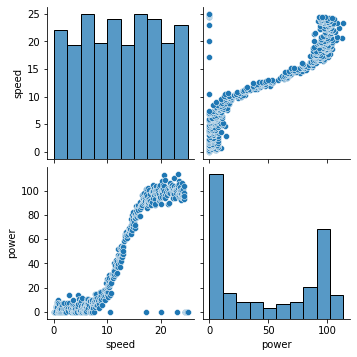

In [35]:
seaborn.pairplot(powerprod_df);

From the pairplot we can see that the shape of power v speed plot is not exactly linear and flattens at low speeds (<10) and high speeds (>20).

Additionally there are a few outlier values which don't really make sense and might hint at a problem with measurement or some other error, this is most noticeable for a few cases where speed is greater than 10 but the power is still at 0.
Unsure at this point whether these values should be included in the model as these values are probably mistakes.

Line of fit equation:  
4.918 x - 13.9

Slope: 4.917595665404671
Intercept: -13.89990263051961
Numpy polyfit score: 0.7289360258564072


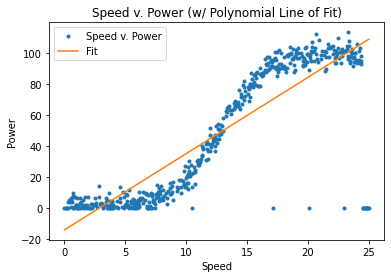

In [47]:
from sklearn.metrics import r2_score #importing r2_score to get r squared from polyfit in this cell

#for convenience turning df columns into np arrays for x and y
x=np.array(powerprod_df['speed'])
y=np.array(powerprod_df['power'])
plt.plot(x, y, '.', label='Speed v. Power') #make simple x y dot plot
#label x and y axis
plt.xlabel('Speed')
plt.ylabel('Power')
#get coefficients for speed versus power, to use to give simple line of fit, pre-linear regression (as shown in Ian's video on Fitting Lines)
a,b = np.polyfit(x, y, 1) #thought it would be neater to explicitly set a and b instead of using coeffs

#getting predict and rsquared taken form article: https://data36.com/linear-regression-in-python-numpy-polyfit/
predict = np.poly1d([a,b]) #predict holds an object that represents equation for the line of fit
print('Line of fit equation:', predict)

np_polyfit_score = r2_score(y, predict(x)) #np_polyfit_score holds r squared of the model, in this case it's comparing the correct y values against the predicted values from the above predict equation

print('\nSlope:',a)
print('Intercept:',b)
print('Numpy polyfit score:', np_polyfit_score)

#Plot the straight line, here I am using np.unique(x) to make more robust in case there were mutltiple x values as otherwise would not get straight line
#for y arg using the standard 'a*x+b' format as we got our a and b coefficients from polyfit
plt.plot(np.unique(x), a*np.unique(x)+b, label='Fit')
plt.title('Speed v. Power (w/ Polynomial Line of Fit)')

plt.legend();

Using polyfit prior to the Linear Regression I was able to get a line of fit and have a score for it, next I will look at doing the same using sklearn's LinearRegression function and will compare the r squared of both.

## Trying out sklearn's LinearRegression
[Documentation for sklearn LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
[Reshaping Dataframe columns to fit in model]()

In [26]:
#Trying a simple Linear regression without splitting dataset
#Using this realpython article as a reference https://realpython.com/linear-regression-in-python/
X = powerprod_df['speed'].values.reshape(-1,1) #need to convert speed column into a 2d numpy array, e.g. 1 column many rows
y = powerprod_df['power'].values.reshape(-1,1)
reg = LinearRegression().fit(X, y)

In [27]:
r_sq = reg.score(X, y) #r_sq (r squared) is the score of the model to show how much prediction error there is https://www.khanacademy.org/math/ap-statistics/bivariate-data-ap/assessing-fit-least-squares-regression/a/r-squared-intuition
print("r squared for generated model:", r_sq)
print("models intercept:", reg.intercept_) #where line intercepts y axis
print("models slope:", reg.coef_) #coef_ returns a 1d array as only 1 target supplied e.g. speed

r squared for generated model: 0.7289360258564072
models intercept: [-13.89990263]
models slope: [[4.91759567]]


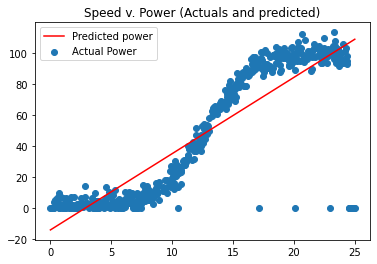

In [41]:
plt.scatter(powerprod_df['speed'],powerprod_df['power'], label='Actual Power')
plt.plot(X, reg.predict(X), 'red', label='Predicted power')
plt.title('Speed v. Power (Actuals and predicted)')
plt.legend()
plt.show();

After this first rough pass at Linear Regression of the windmill data we can see that the line is ok overall, it matches the general shape of the data, but looks like it has a low degree of accuracy for many of the points and seems to give an accurate representation for only the areas where the line intersects the scatter groups.

This line is also probably being skewed by the outlier values of 0 power at higher speeds (and possibly at low speeds too).

In [98]:
X = powerprod_df['speed'].values.reshape(-1,1)
y = powerprod_df['power'].values.reshape(-1,1)
#using train_test_split to split out my dataset to training and testing
X_train, X_test, y_train, y_test = mod.train_test_split(
    X, y, test_size=0.33, random_state=42)

In [99]:
#use training data to fit the model
reg_train = LinearRegression().fit(X_train, y_train)

In [100]:
#get predictions for y using the test data
y_pred = reg_train.predict(X_test)

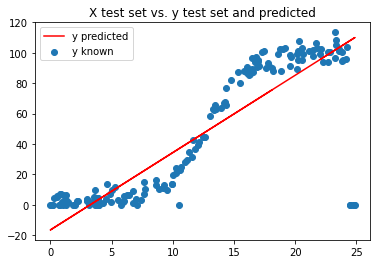

In [101]:
#plot the test data for X vs the test data for y 
#overlay the test data for X vs the predicted data for y
plt.scatter(X_test,y_test, label='y known')
plt.plot(X_test, y_pred, label='y predicted', color='red')
plt.title('X test set vs. y test set and predicted')
plt.legend()
plt.show()

In [102]:
r_sq = reg_train.score(X_test, y_test)
print("r squared for generated model:", r_sq)
print("models intercept:", reg_train.intercept_)
print("models slope:", reg_train.coef_)

r squared for generated model: 0.6950401996553021
models intercept: [-16.47804425]
models slope: [[5.0857491]]


We can see this model doesn't perform quite as well as the first one but this makes sense as it is missing around 30% of the overall points, next steps will be to start validating this model and seeing what improvements can be made

Taking a quick break away from using the model.score function I try out r2_score and mean_squared_error functions from sklearn.metrics

In [103]:
from sklearn.metrics import mean_squared_error, r2_score

print(r2_score(y_test,y_pred))
print(mean_squared_error(y_true=y_test,y_pred=y_pred))

0.6950401996553021
559.0055059430915


We have a pretty good r squared value above of greater than 60% which indicates that we have a pretty good fit and are not overfitting, however it is strange how large the mean squared error is at this point, I would have expected it to be significantly smaller and am not sure as to why it is so large, perhaps this is due to having many negative values due to the y intercept.

In an effort to improve the model I am now going to clean up the original dataframe and eliminate instances where there is a value greater than 0 for speed and equal to 0 for power.

In [104]:
cleaned_df = powerprod_df #assign existing dataframe to new variable to be cleaned up

In [105]:
cleaned_df = cleaned_df[(cleaned_df['power'] != 0) | (cleaned_df['speed'] == 0.0)] #remove rows where power is greater than 0 OR speed is equal to 0
cleaned_df

,speed,power
0,0.000,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [106]:
cleaned_df.describe()

,speed,power
count,452.000000,452.000000
mean,12.975531,53.113478
std,6.855738,40.554469
min,0.000000,0.000000
25%,7.294500,8.412750
50%,13.013000,56.123500
75%,18.775250,94.698250
max,24.399000,113.556000


In [107]:
powerprod_df['power'].sum()


24007.291999999998

In [108]:
cleaned_df['power'].sum()

24007.291999999998

In [109]:
X = cleaned_df['speed'].values.reshape(-1,1)
y = cleaned_df['power'].values.reshape(-1,1)
#using train_test_split to split out my dataset to training and testing, sticking with test size of 33% of values
X_train, X_test, y_train, y_test = mod.train_test_split(
    X, y, test_size=0.33, random_state=42)
#use training data to fit the model
reg_train = LinearRegression().fit(X_train, y_train)
#get predictions for y using the test data
y_pred = reg_train.predict(X_test)

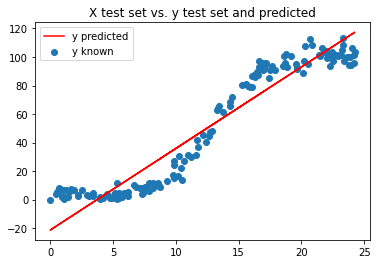

In [110]:
#plot the test data for X vs the test data for y 
#overlay the test data for X vs the predicted data for y
plt.scatter(X_test,y_test, label='y known')
plt.plot(X_test, y_pred, label='y predicted', color='red')
plt.title('X test set vs. y test set and predicted')
plt.legend()
plt.show()

In [111]:
r_sq = reg_train.score(X_test, y_test)
print("r squared for generated model:", r_sq)
print("models intercept:", reg_train.intercept_)
print("models slope:", reg_train.coef_)
print("mean squared error:", mean_squared_error(y_true=y_test,y_pred=y_pred))

r squared for generated model: 0.9065315848026159
models intercept: [-21.29091501]
models slope: [[5.71769211]]
mean squared error: 170.10248213054675


By cleaning up the data and removing outliers (where power is 0 and there is a value greater than 0 for speed), I have significantly increased the r_squared by nearly 20 percent, making it now approximately 90%.

The mean squared error has also significantly reduced from what it formerly was without any data removed.

# TODO - Add function to perform linear regression fit model etc. add score of model against entire dataset